In [1]:
import numpy as np

#### Element-by-element operations is the default.

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Using a normal operation on arrays works through them element-by-element.  For example, matrix multiplication cannot be done using normal multiplication operator.</font>

In [2]:
A = 3 * np.ones((2,2)) #3 is multiplied with every element in the array
B = 6 * np.ones((2,2)) #6 is multiplied with every element in the array
A * B

array([[18., 18.],
       [18., 18.]])

#### Is it matmul or dot?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Both will give same result for a 2D array, but 3D and above the results are different.  In the case of 2D arrays, matmul should be preferred over dot operation.</font>

In [3]:
np.matmul(A, B)

array([[36., 36.],
       [36., 36.]])

In [4]:
A @ B  # same as matmul

array([[36., 36.],
       [36., 36.]])

In [5]:
np.dot(A, B) #same as matrix multiplication for 2 x 2 arrays.

array([[36., 36.],
       [36., 36.]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Between matmul and dot, always prefer to use matmul</font>

In [6]:
#matrix multiplication and dot product are not same for higher dimensional arrays (more than 2D)
A = np.random.rand(2,3,3)
B = np.random.rand(2,3,3)
print(np.dot(A, B).shape)
print((A @ B).shape)

(2, 3, 2, 3)
(2, 3, 3)


#### Broadcasting is a superb feature of NumPy, but can I broadcast an entire row?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">The entire first (and only) row of A gets broadcast during multiplication operation with B.  This works only since the number of columns in A and B are equal.</font>

In [7]:
A = 3 * np.ones((1,2))
B = 6 *np.ones((3,2))
A * B

array([[18., 18.],
       [18., 18.],
       [18., 18.]])

#### What about broadcasting an entire column?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">The entire first (and only) column of A gets broadcast during multiplication operation with B.  This works only since the number of rows in A and B are equal.</font>

In [8]:
A = 3 * np.ones((2,1))
B = 6 *np.ones((2,3))
A * B

array([[18., 18., 18.],
       [18., 18., 18.]])

#### Stack or concatentate?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Both can achieve the same result, but while using concatenate parameter must a tuple, and axis must be specified.  Thus, concatenating along 0th axis stacks vertically, and along 1st axis stacks horizontally.</font>

In [9]:
A = np.ones((2,2))
B = 2*np.ones((2,2))

In [10]:
A_B = np.hstack((A,B))
# A_B = np.concatenate((A, B), axis=1) # same as above
print(A_B)

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]]


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Infact, np.column_stack also produces the same output</font>

In [11]:
A_B = np.column_stack((A, B))
A_B

array([[1., 1., 2., 2.],
       [1., 1., 2., 2.]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">But, hold right there.  There's important difference...np.hstack gives an error when h-stacked with a single dimensional array.  But, column_stack works!</font>

In [12]:
A = np.array([1,2]) # a single dimensional array
B = 2*np.ones((2,2))

In [13]:
try:
    np.hstack((A,B)) 
except:
    print("Gives an error!")

Gives an error!


In [14]:
np.column_stack((A,B))

array([[1., 2., 2.],
       [2., 2., 2.]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Let's create hstack another array, and then stack them vertically using np.vstack</font>

In [15]:
C = 3*np.ones((2,2))
D = 4*np.ones((2,2))
C_D = np.hstack((C,D))
# C_D = np.concatenate((C, D), axis=1) # same as above
print(C_D)

[[3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [16]:
T = np.vstack((A_B,C_D))
# T = np.concatenate((A_B, C_D), axis=0) # same as above
print(T)

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Again, like in the previous case, np.row_stack also produces the same output as vstack.  However, note that it doesn't work with single dimensional arrays.</font>

In [17]:
np.row_stack((A_B, C_D))

array([[1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [3., 3., 4., 4.],
       [3., 3., 4., 4.]])

#### Hmm, but can you explain how does this axis parameter work?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">For example, using axis parameter with np.sum, sums up all elements of the array down the column when axis=0, and across row when axis=1</font>

In [18]:
A = np.random.randint(1, 10, size=12).reshape(3,4)
print(A)

[[5 2 1 4]
 [8 5 8 3]
 [1 5 9 9]]


In [19]:
np.sum(A, axis=0) #sums down the column

array([14, 12, 18, 16])

In [20]:
np.sum(A, axis=1) #sums across the row

array([12, 24, 24])

#### How did that reshape thingy work in the previous section?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">'reshape' method fundamentally reshapes any input array into the given shape.  Use -1 to compute the shape automatically.</font>

In [21]:
A = np.random.randint(1, 10, size=12).reshape(-1,4) #because 12 = 3 * 4
print(A)

[[2 6 5 4]
 [1 8 5 2]
 [8 3 6 3]]


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">reshape works with arrays of any dimension.</font>

In [22]:
A = np.random.randint(1, 10, size=12).reshape(-1,2,2) #because 12 = 3 * 2 * 2
print(A)

[[[5 5]
  [6 2]]

 [[8 8]
  [5 5]]

 [[4 3]
  [6 1]]]


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Consider a single-dimensional array with 12 elements.  It has shape (12,).  It can be reshaped using any of the two methods, but the first method (reshape) is preferred, since its usage makes it consistent.</font>

In [23]:
A = np.random.randint(1, 10, size=12)
#print(A.shape) # (12,)
print(A.reshape(A.shape[0],1))
print(A[:,None])  # same as above

[[4]
 [1]
 [3]
 [8]
 [5]
 [3]
 [5]
 [2]
 [3]
 [1]
 [6]
 [5]]
[[4]
 [1]
 [3]
 [8]
 [5]
 [3]
 [5]
 [2]
 [3]
 [1]
 [6]
 [5]]


#### How to split arrays?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">One obvious method is to use indexing or slicing.  Another is to use split method.  This is effectively reversing the operations of concatenation or stacking</font>

In [24]:
arr = np.array([1, 2, 3, 4, 5, 6])
np.array_split(arr, 3)

[array([1, 2]), array([3, 4]), array([5, 6])]

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Works with higher dimensional arrays too...</font>

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">The 'split' method splits along the rows by default, or by explicitly using axis=0.  Now, this can be joined back together by using vstack</font>

In [25]:
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
arr1 = np.array_split(arr, 3)
print(arr1)
np.vstack(arr1)

[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]]), array([[ 9, 10],
       [11, 12]])]


array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">...or along columns with axis=1.  Now, this can be joined back together by using hstack</font>

In [26]:
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
arr1=np.array_split(arr, 3,axis=1)
print(arr1)
np.hstack(arr1) #reproduces the original array arr

[array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11]]), array([[ 2],
       [ 4],
       [ 6],
       [ 8],
       [10],
       [12]]), array([], shape=(6, 0), dtype=int32)]


array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

#### So far so good.  Let's change gears, and explore into ways to generate data...

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">There are many options.  
I. Let's see usage of np.random module</font>

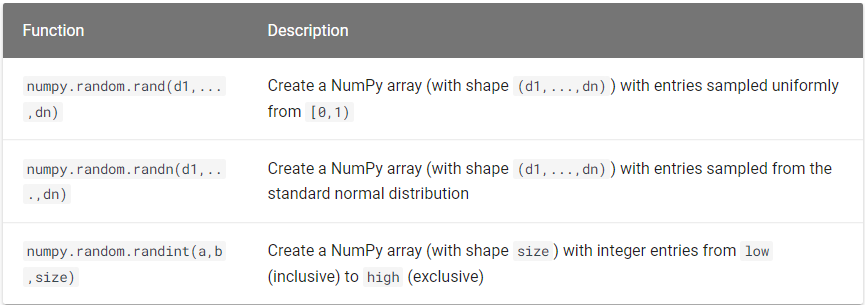

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">The first two of these functions have similar usage...</font>

In [27]:
np.random.rand() # Sample a random number from the uniform distribution

0.6860274608256992

In [28]:
np.random.rand(3) # Sample 3 random numbers from the uniform distribution

array([0.99043144, 0.98862705, 0.91413454])

In [29]:
np.random.rand(2,4) # Create 2D NumPy array of random samples from the uniform distribution

array([[0.94578773, 0.60646954, 0.69452383, 0.74704187],
       [0.96964067, 0.84587051, 0.86184451, 0.8902027 ]])

In [30]:
np.random.randn() # Sample a random number from the standard normal distribution

-0.984286695346483

In [31]:
np.random.randn(3) # Sample 3 random numbers from the standard normal distribution

array([-0.00136312, -0.2026632 , -0.92983159])

In [32]:
np.random.randn(2,4) # Create 2D NumPy array of random samples from the standard normal distribution

array([[-1.14025294, -1.03068055, -0.78479022,  0.02972362],
       [-0.78260768, -0.59118568, -0.00461672, -1.43204867]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">...but the last function has a different usage</font>

In [33]:
np.random.randint(-10,10) #One random integer sampled uniformly from given interval

1

In [34]:
np.random.randint(0,2,(4,8))  # 4 x 8 array containing random integers between 0 and 2 (not inclusive)

array([[0, 0, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">and, not listed above is the function np.random.random that produces an array of floats between 0 and 1, in the given shape</font>

In [35]:
np.random.random((3,4))

array([[0.94874934, 0.82101658, 0.97602675, 0.60035454],
       [0.3285832 , 0.58454764, 0.94247606, 0.93763408],
       [0.89654824, 0.16823035, 0.25088461, 0.64157866]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">II. Creating an identity square matrix of given shape</font>

In [36]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">III
    . Creating an diagonal (square) matrix with specified diagonal elements</font>

In [37]:
np.diag([2,3,4])

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">...or a small variation of this is to specify a diagonal vector, offset by a given number</font>

In [38]:
np.diag([2,3,4],2)

array([[0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">IV
    . Creating a upper/lower triangular matrix of given shape.  Interestingly, this works even with non-square matrices.</font>

In [39]:
M = np.random.randint(1,10,24).reshape(4,6)
print(np.tril(M))
print(np.triu(M))

[[1 0 0 0 0 0]
 [7 4 0 0 0 0]
 [2 6 4 0 0 0]
 [9 2 4 9 0 0]]
[[1 4 4 9 3 5]
 [0 4 6 4 2 2]
 [0 0 4 1 6 1]
 [0 0 0 9 6 2]]


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">...or a small variation of this is offset the diagonal by a given number</font>

In [40]:
print(np.tril(M,2))

[[1 4 4 0 0 0]
 [7 4 6 4 0 0]
 [2 6 4 1 6 0]
 [9 2 4 9 6 2]]


#### Can I generate data points separated equally from each other?  Like in an arithmetic progression?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Sure, why not?  Use np.arange or np.linspace</font>

In [41]:
np.arange(1,10, 0.2) # generates floats between 1 and 10, separated by 0.2

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ,
       6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6,
       8.8, 9. , 9.2, 9.4, 9.6, 9.8])

In [42]:
np.linspace(1,10,20) #Generates 20 floats, between 1 and 10.

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [43]:
np.logspace(0, 2, 5) # Generates 5 data points in logspace between 10**0=1 to 10**2=100

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

#### Meshgrid...that sounds like a flashy name.  What's that?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">meshgrid is inspired by matlab, and is typically used to create contour plots.  
    
Use np.meshgrid with two 1D arrays, to create a meshgrid containing pairs (co-ordinates) created with one element from each of the input arrays.</font>

In [44]:
x = np.array([-1, 0, 1])
y = np.array([-2, 0, -2])
X, Y = np.meshgrid(x,y)  # same as X = np.vstack((x,x,x)) and Y = np.vstack((y,y,y))
print(X)
print(Y)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-2 -2 -2]
 [ 0  0  0]
 [-2 -2 -2]]


#### What is np.argmax function?  What is it used for?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Finds the index of the maximum in a row/column of given array</font>

In [45]:
A = 10 * np.random.random((7, 7))
print(A)

[[5.71802354 2.36802705 7.99429214 6.61402667 3.44557503 1.05122351
  8.89653017]
 [5.47548305 4.95520033 7.57913206 2.80290403 4.72281998 1.92678402
  4.98436325]
 [3.63595865 9.751185   2.56819632 9.88266803 4.92264724 6.85362002
  1.98697167]
 [3.45167206 8.99935225 8.74873161 1.09889236 8.76994547 7.66004671
  0.6675705 ]
 [1.57236191 8.43013371 2.18904798 7.2952716  2.05403013 4.6353698
  9.31760341]
 [4.75950653 9.23097178 1.25771049 1.54740199 8.58248708 3.7911052
  9.65211984]
 [4.98327041 1.00734727 2.57993573 1.34720797 7.75728658 8.28536273
  1.13213514]]


In [46]:
np.argmax(A) #Flattens the array before returning the index of the max.element.

17

In [47]:
np.argmax(A, axis=0) #Finds index of the max. element down each column.

array([0, 2, 3, 2, 3, 6, 5], dtype=int64)

In [48]:
np.argmax(A, axis=1) #Finds index of the max. element across each row.

array([6, 2, 3, 1, 6, 6, 5], dtype=int64)

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Consider the following code snippet.  What is it doing?</font>

In [49]:
N = 10000
x = np.linspace(0,2*np.pi,N)
y = x * np.sin(x) + np.cos(4*x)

y_max = np.max(y)
y_min = np.min(y)
x_max = x[np.argmax(y)]
x_min = x[np.argmin(y)]

print('Absolute maximum value is y =',y_max,'at x =',x_max)
print('Absolute minimum value is y =',y_min,'at x =',x_min)

Absolute maximum value is y = 2.5992726072887007 at x = 1.628136126702901
Absolute minimum value is y = -5.129752039182 at x = 5.34187001663503


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">We know linspace generates 10K equally spaced floats between 0 and $2\pi$

We also saw previously how argmax finds the index that generates the maximum value for the specified parameter.

Since x and y have same index, we can use argmax(y) to index into vector x, and find the x that generates the maximum y.</font>

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Great going so far!  Let's try a few exercises now</font>

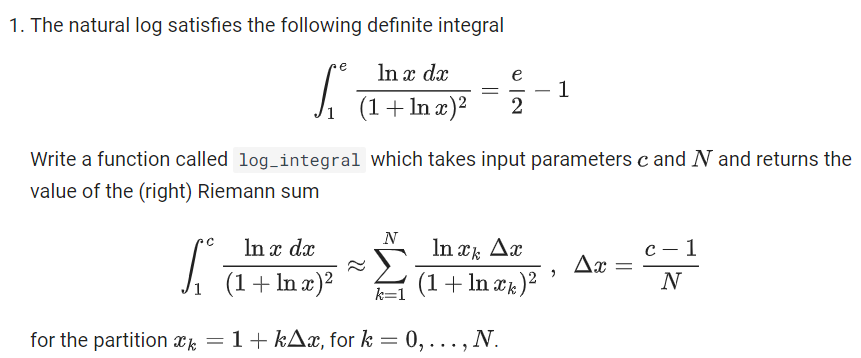

In [50]:
def log_integral(c, N):
    del_x = (c - 1) / N
    result = 0
    for k in range(1, N + 1):
        x_k = 1 + (k * del_x)
        numerator = np.log(x_k) * del_x
        denominator = (1 + np.log(x_k)) ** 2
        result += numerator/denominator

    return result

In [51]:
log_integral(10, 10000)

2.0280259971456034

2. 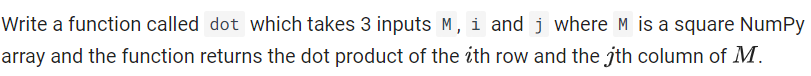

In [52]:
M = np.array([[2,4,5],[5,6,7],[3,2,5]])

In [53]:
def dot(M, i, j):
    return np.dot(M[i, :], M[:, j])

In [54]:
dot(M, 1, 1)

70

#### How to create permutations and combinations of array elements?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Use itertools module from the Python standard library</font>

In [55]:
import itertools

In [56]:
#returns all pair-wise permutations.
arr = np.array([1, 2, 3, 4, 5])
print(list(itertools.permutations(arr, r=2)))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4)]


In [57]:
#returns all pair-wise combinations.  Notice, (1,2) is considered same as (2,1)
arr = np.array([1, 2, 3, 4, 5])
print(list(itertools.combinations(arr, r=2)))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


In [58]:
#returns all pair-wise combinations, considering repeated elements.
arr = np.array([1, 2, 3, 4, 5])
print(list(itertools.combinations_with_replacement(arr, r=2)))

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 2), (2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 4), (4, 5), (5, 5)]


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">...and, combinations will work irrespective of the number of dimensions of the input array, where entire rows/columns are used to create combinations</font>

In [59]:
arr = np.array([[2,4,5],[5,6,7],[3,2,5]])
arr_comb = itertools.combinations_with_replacement(arr, r=2)

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Below is a code snippet that could be used to find the product of every pair of column vectors generated above.  For the complete code of Polynomial transformation, scroll down to the section <a href='http://localhost:8888/notebooks/IIT-M/MLT/Python%20to%20numpy.ipynb#Some-applications' target="_self">Some Applications<a></font>

In [60]:
for each in arr_comb:
    print(each)
    print(each[0] * each[1])

(array([2, 4, 5]), array([2, 4, 5]))
[ 4 16 25]
(array([2, 4, 5]), array([5, 6, 7]))
[10 24 35]
(array([2, 4, 5]), array([3, 2, 5]))
[ 6  8 25]
(array([5, 6, 7]), array([5, 6, 7]))
[25 36 49]
(array([5, 6, 7]), array([3, 2, 5]))
[15 12 35]
(array([3, 2, 5]), array([3, 2, 5]))
[ 9  4 25]


#### Filtering an array sounds cool!  How can I do that?

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Use the concept of boolean indexing, to filter array elements.  Here, an array of booleans is used to index into the first column of a multi-dimensional array</font>

In [61]:
arr = np.array([41, 42, 43, 44])
filter_arr = arr > 42 #creating the mask
arr[filter_arr]

array([43, 44])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">In this example, an array of pre-created booleans is used to index into the first column of a multi-dimensional array</font>

In [62]:
names = np.array(['Anand', 'Venkatesh', 'Karthik', 'Milind', 
                 'Andrew', 'Ashish', 'Madhavan'])
data = np.random.randn(7,4)
data

array([[-0.44802394,  1.20465533,  1.194901  , -0.40629002],
       [ 0.38977132,  1.26243029,  1.35836862,  0.61255061],
       [ 0.74625789,  0.79336647,  0.41590006,  1.21711907],
       [ 0.18864379,  0.38575179,  0.91068223,  0.31304133],
       [ 1.3579572 ,  0.3545516 ,  0.19317676,  0.88093934],
       [ 0.80337543, -1.39250766,  2.21518162,  1.82423003],
       [-1.16361622,  1.18699622, -0.05176198,  0.41288582]])

In [63]:
data[names == 'Anand']

array([[-0.44802394,  1.20465533,  1.194901  , -0.40629002]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">This is the same as the following operation</font>

In [64]:
data[0, :]

array([-0.44802394,  1.20465533,  1.194901  , -0.40629002])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">np.where also works the same way...</font>

In [65]:
data[np.where(names=='Anand')]

array([[-0.44802394,  1.20465533,  1.194901  , -0.40629002]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">but, there's a important difference.  Consider this.</font>

In [66]:
names = np.array(['Anand', 'Venkatesh', 'Karthik', 'Milind'])
data = np.random.randn(7,4)
data

array([[ 0.27147253, -0.9489426 ,  1.16858783, -1.327907  ],
       [-1.17549594, -0.93903194, -0.17684913, -2.17761053],
       [ 0.25333078,  0.23791451, -1.18026481, -0.10922741],
       [ 0.09665304, -2.50761894,  0.52540273, -0.62478077],
       [ 0.74211834, -1.71093676,  0.23190265,  1.41609324],
       [-0.3727819 , -0.81328892,  1.97455558, -0.2749206 ],
       [-1.10149795, -0.40954608, -0.09183005, -0.47028891]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Using names with data will give an error, since the number of rows in 'data' don't match with the number of elements in 'names'</font>

In [67]:
# this is embedded in a try block, only so that it doesn't stop from Run all cells.
try:
    data[names == 'Anand']
except:
    print("This is supposed to give an error!")

This is supposed to give an error!


<font style="font-family: Gill Sans; font-size:1.1.1em;color:Magenta;">But, np.where will still work!</font>

In [68]:
data[np.where(names=='Anand')]

array([[ 0.27147253, -0.9489426 ,  1.16858783, -1.327907  ]])

<font style="font-family: Gill Sans; font-size:1.1.1em;color:Magenta;">Following code snippet shows how np.where works.  It returns a tuple containing an array of indices (see below), and as shown in the above code snippet, it can be used index into the original array.</font>

In [69]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x = np.where(arr%2 == 1)
print(x)
print(arr[x]) 

(array([0, 2, 4, 6], dtype=int64),)
[1 3 5 7]


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">However, the main intent of np.where is to vectorize operations.  Thus...</font>

In [70]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

condition = np.array([True, False, True, True, False])

np.where(condition, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Here, depending on the cond value, either xarr is chosen or yarr is chosen</font>

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Quite usefully, this can be used to pick rows from either xarr or yarr, depending on the condition</font>

In [71]:
xarr = np.random.randint(1,10,10).reshape(5,2)
yarr = np.random.randint(1,10,10).reshape(5,2)
print(xarr)
print(yarr)

[[1 7]
 [4 3]
 [1 1]
 [8 8]
 [5 5]]
[[6 2]
 [8 8]
 [9 1]
 [2 8]
 [6 1]]


In [72]:
condition = np.array([True, False, True, False, True]).reshape(5, 1)

np.where(condition, xarr, yarr)

array([[1, 7],
       [8, 8],
       [1, 1],
       [2, 8],
       [5, 5]])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">or pick columns...</font>

In [73]:
condition = np.array([True, False]).reshape(1,2)

np.where(condition, xarr, yarr)

array([[1, 2],
       [4, 8],
       [1, 1],
       [8, 8],
       [5, 1]])

#### More useful techniques

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Use ravel to 'flatten' an array of n-dimensions.  Alternatively, reshape to -1</font>

In [74]:
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
np.ravel(arr)
#arr.reshape(-1) #achieves the same result as above

array([1, 2, 3, 4, 5, 6, 7, 8])

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Alternatively, use nditer method to iterate over a n-dimensional array without 'flattening'</font>

In [75]:
for x in np.nditer(arr):
  print(x)

1
2
3
4
5
6
7
8


<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Or enumerate the elements in an n-dimensional array, similar to enumerating a list in Python</font>

In [76]:
for x in np.ndenumerate(arr):
  print(x)

((0, 0, 0), 1)
((0, 0, 1), 2)
((0, 1, 0), 3)
((0, 1, 1), 4)
((1, 0, 0), 5)
((1, 0, 1), 6)
((1, 1, 0), 7)
((1, 1, 1), 8)


### Some applications

#### 1. One-hot encoding

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Use 'searchsorted' to find the indices into a sorted array a such that, if the corresponding elements in v were inserted before the indices, the order of a would be preserved.  Here's how it works.</font>

In [77]:
# -10 should be the first element to maintain the sorted nature of a, so it should have an index 0
# 10 should be the last element to maintain the sorted nature of a, so it should have an index 5
# 2 should be the second element to maintain the sorted nature of a, so it should have an index 1
# 3 should be the third element to maintain the sorted nature of a, so it should have an index 2
a = [1,2,3,4,5]
v = [-10, 10, 2, 3]
np.searchsorted(a, v)

array([0, 5, 1, 2], dtype=int64)

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Quite usefully, it can be used to convert an array of obejcts to their indices, as far as the elements in v can be compared with that in a, and hence can be ordered.  This can be [used for one-hot encoding](https://stackoverflow.com/questions/58406795/how-to-convert-2d-numpy-array-to-one-hot-encoding)</font>

In [78]:
X = [8,2,6,4,6,2,5]

v = np.array(X)
a = np.unique(X) # Get unique classes.

idx = np.searchsorted(a, v)
print(idx)

[4 0 3 1 3 0 2]


In [79]:
#Convert the input array v to one-hot encoding
eye = np.eye(a.shape[0])
np.row_stack([eye[i] for i in idx.T])

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

#### 2. Polynomial Transformation

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;">Here's an alternative logic to solve the polynomial transformation problem in Week3 of MLT</font>

In [80]:
def product(item):
    try:
        return item[0] * item[1]
    except:
        return item[0]

def polynomial_transform(X, degree):
    if X.ndim == 1:
        X = X[:, None]
    X = X.T
    result = np.ones(X.shape[1])
    for i in range(1, degree + 1):
        for each in [product(each) for each in itertools.combinations_with_replacement(X, i)]:
            result = np.column_stack((result, each))
    return result

In [81]:
X = np.array([[2, 3],[4, 5]])
polynomial_transform(X, 3)

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  4.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25., 16., 16., 20., 25.]])

References:

https://personal.math.ubc.ca/~pwalls/math-python/scipy/numpy

https://github.com/alanmenchaca/numpy-notes/blob/main/Creating_Arrays.ipynb

https://github.com/vicsho997/NumpyPractice

https://github.com/boscoybarra/algebra-basics-with-numpy-cheat-sheet/blob/master/Numpy_Arrays_Cheat_Sheet.ipynb

<font style="font-family: Gill Sans; font-size:1.1em;color:Magenta;"> While discussing about this topic [here](https://discourse.onlinedegree.iitm.ac.in/t/how-to-migrate-from-python-to-numpys-way-of-thinking/33632/5), a few suggestions came up from Karthik.T.  Including those here as is, since I believe these are very relevant to the learning - very specifically the suggestion#2

###### Suggestion-1
From the exam point of view, one suggestion is to narrow down the list of relevant methods, group them according to some common theme, see where they pop up in the assignments/colabs, and be very thorough with their usage:

Array manipulation

- ndim
- reshape
- transpose

Initializing arrays

- ones
- zeros

Summary

- sum
- mean
- var
- std

Multiple arrays

- concatenate
- column_stack
- dot

Sometimes there may be multiple ways to do the same thing, so it might be a good idea to choose one method and stick to that. Making this choice before exam helps a lot. For example, I seldom use the methods transpose and dot. I directly go for X.T and X.T @ X instead of np.transpose(X) and np.dot(X, X).

###### Suggestion-2
The other suggestion is to gain fluency in converting mathematical equations to their NumPy equivalents. I think a lot of NumPy usage ultimately boils down to this translation.

###### Suggestion-3
Fluency with operations that are directly done on a NumPy array:

- access a particular row or column
- get all data-points that belong to a particular class
</font>